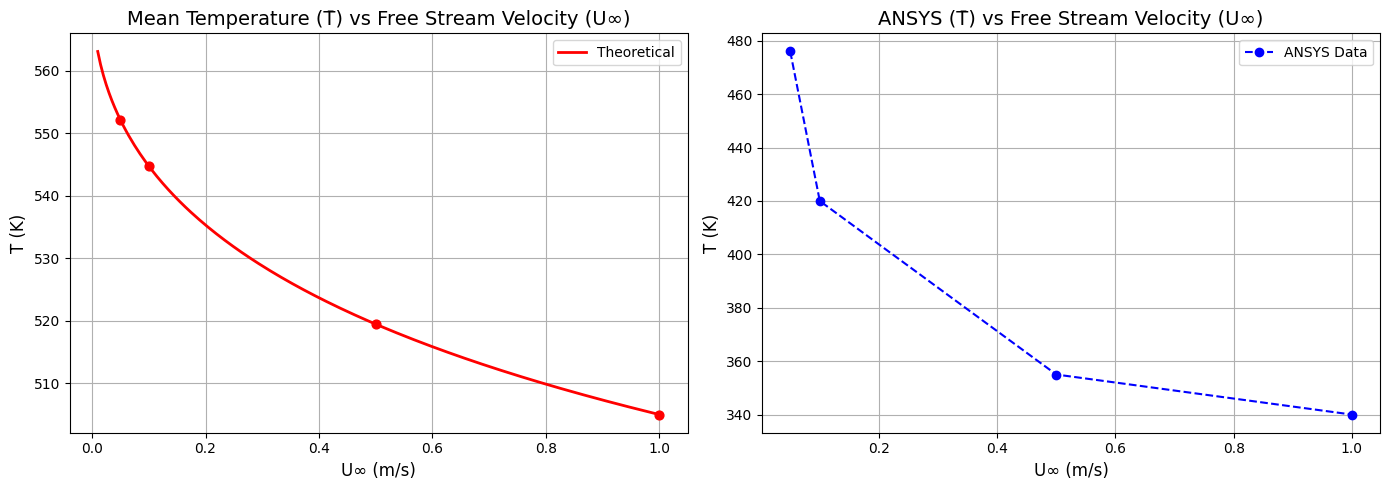

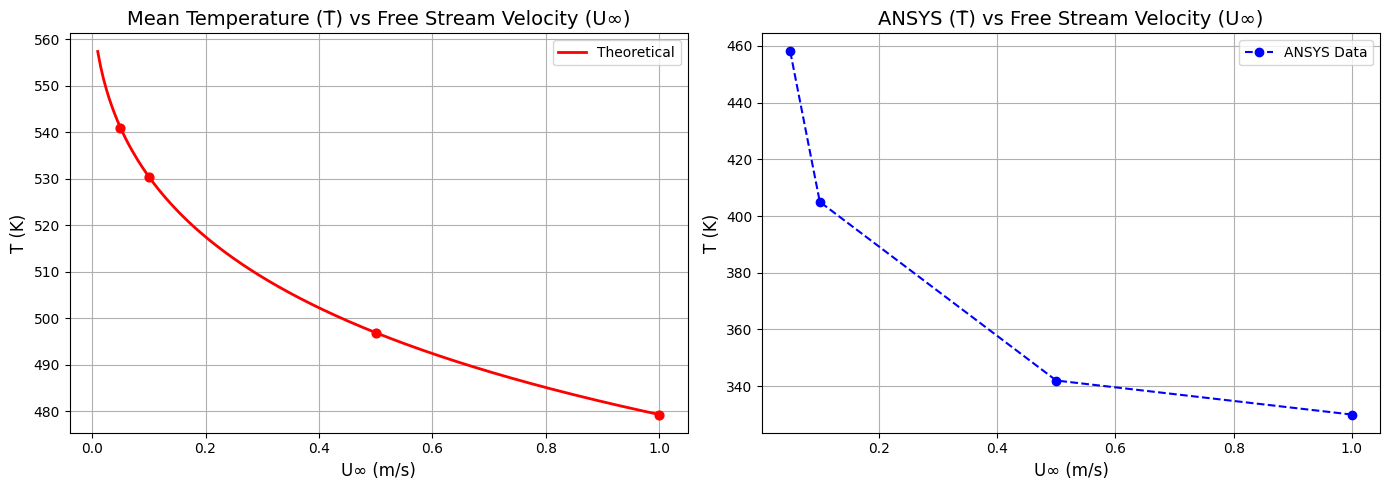

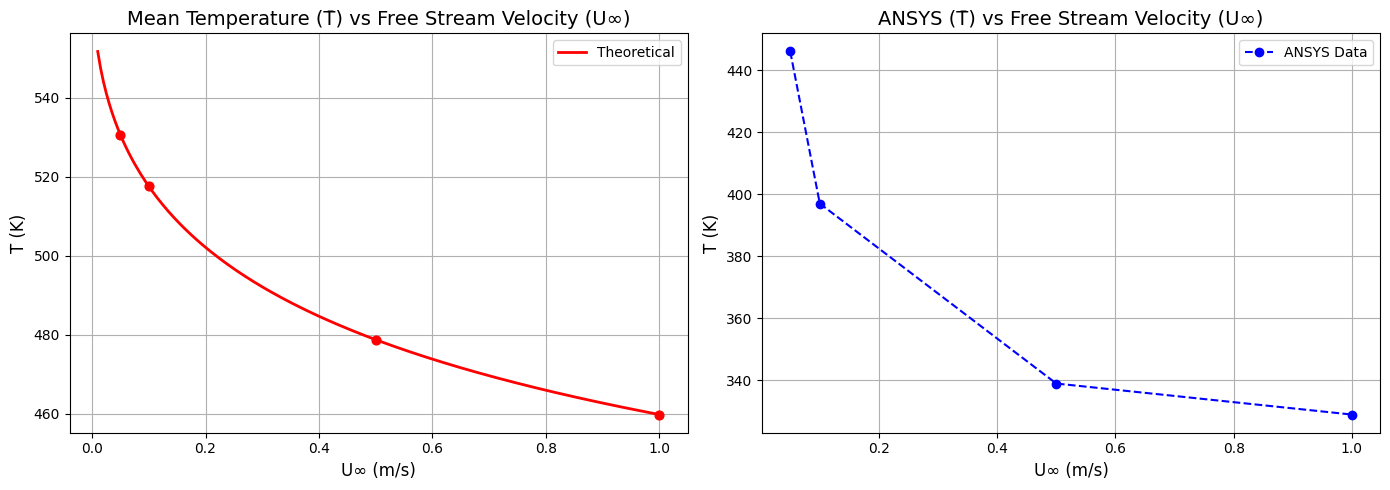

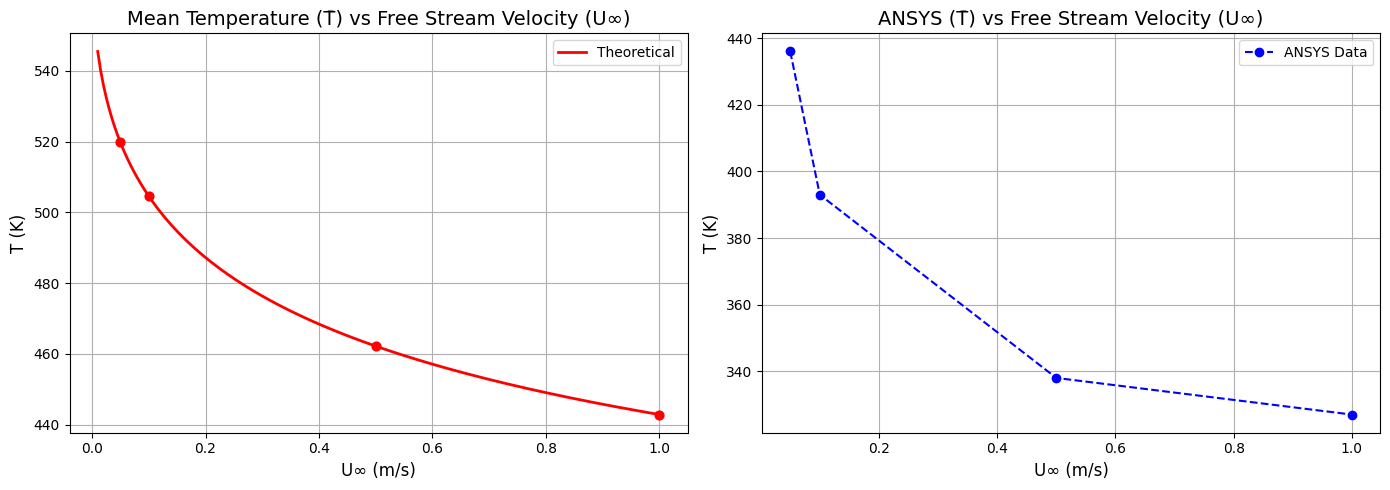

In [2]:
### ALL FIN CASE ###

import numpy as np
import matplotlib.pyplot as plt

# Given values for the first equation (fin equation)
# P_list = [1.2, 1.2, 1.2, 1.2]
P_list = [1.2, 0.58, 0.37, 0.27]
# Ac_list = [0.09, 0.09, 0.09, 0.09]
Ac_list = [0.09, 0.021, 0.0087, 0.0045]
# n_fin = [1,2,3,4]
n_fin = [1,1,1,1]

L = 0.15       # Length of fin (m)
k_fin = 387.6  # Thermal conductivity of fin (W/m.K)

T_inf = 300    # Ambient temperature (K)
T_b = 573      # Base temperature (K)  --- maybe need to scale it for every velocity (573, 373)

# Given values for the convection correlation (flat plate)
L_h = 1.0      # Characteristic length for convection (m)
k_air = 0.6    # Thermal conductivity of air (W/m.K)
Pr = 7         # Prandtl number
nu = 0.8007e-6 # Kinematic viscosity (m^2/s)

# Define function for h_bar_L as function of U_infinity
def h_bar_L(U_inf):
    term = 0.332 * (k_air / L_h) * np.sqrt((U_inf * L_h) / nu) * (Pr ** (1/3))
    return 2 * term

# Define function for T_mean as function of h
def T_mean(h):
    mL = np.sqrt((h * P * L**2) / (k_fin * Ac))*n
    sqrt_term = np.sqrt((h * Ac) / (k_fin * P))/n

    num = np.sinh(mL) + sqrt_term * (np.cosh(mL) - 1)
    den = mL * (np.cosh(mL) + sqrt_term * np.sinh(mL))

    return T_inf + (T_b - T_inf) * (num / den)

# Define U_infinity range
U_inf_values = np.linspace(0.01, 1, 200)  # m/s
# ANSYS DATA
y_listansys = [[476, 420, 355, 340], #1 fins
               [458, 405, 342, 330], #2 fins
               [446, 397, 339, 329], #9 fins
               [436, 393, 338, 327]] #16 fins

theoretical_T = [[],
                 [],
                 [],
                 []]

for i in range(4):
  P = P_list[i]
  Ac = Ac_list[i]
  n = np.sqrt(n_fin[i])

  # Calculate h and T_mean values
  h_values = h_bar_L(U_inf_values)
  T_mean_values = T_mean(h_values)

  theoretical_T[i].append(T_mean(h_bar_L(0.05)))
  theoretical_T[i].append(T_mean(h_bar_L(0.1)))
  theoretical_T[i].append(T_mean(h_bar_L(0.5)))
  theoretical_T[i].append(T_mean(h_bar_L(1)))

  # plots
  fig, axes = plt.subplots(1, 2, figsize=(14, 5))

  # Left plot: Theoretical T_mean vs U_infinity
  axes[0].plot(U_inf_values, T_mean_values, 'r', linewidth=2, label='Theoretical')
  axes[0].set_title('Mean Temperature (T̄) vs Free Stream Velocity (U∞)', fontsize=14)
  axes[0].set_xlabel('U∞ (m/s)', fontsize=12)
  axes[0].set_ylabel('T̄ (K)', fontsize=12)
  axes[0].grid(True)
  axes[0].legend()

  special_points = [0.05, 0.1, 0.5, 1.0]
  special_T_values = np.interp(special_points, U_inf_values, T_mean_values)
  axes[0].scatter(special_points, special_T_values,
                  color='red', s=40, zorder=5, label='_nolegend_')

  # Right plot: ANSYS Data for T_mean
  x_list_T = [0.05, 0.1, 0.5, 1]
  y_list_T = y_listansys[i]
  axes[1].plot(x_list_T, y_list_T, 'b--o', label='ANSYS Data')
  axes[1].set_title('ANSYS (T̄) vs Free Stream Velocity (U∞)', fontsize=14)
  axes[1].set_xlabel('U∞ (m/s)', fontsize=12)
  axes[1].set_ylabel('T̄ (K)', fontsize=12)
  axes[1].grid(True)
  axes[1].legend()

  plt.tight_layout()
  plt.show()


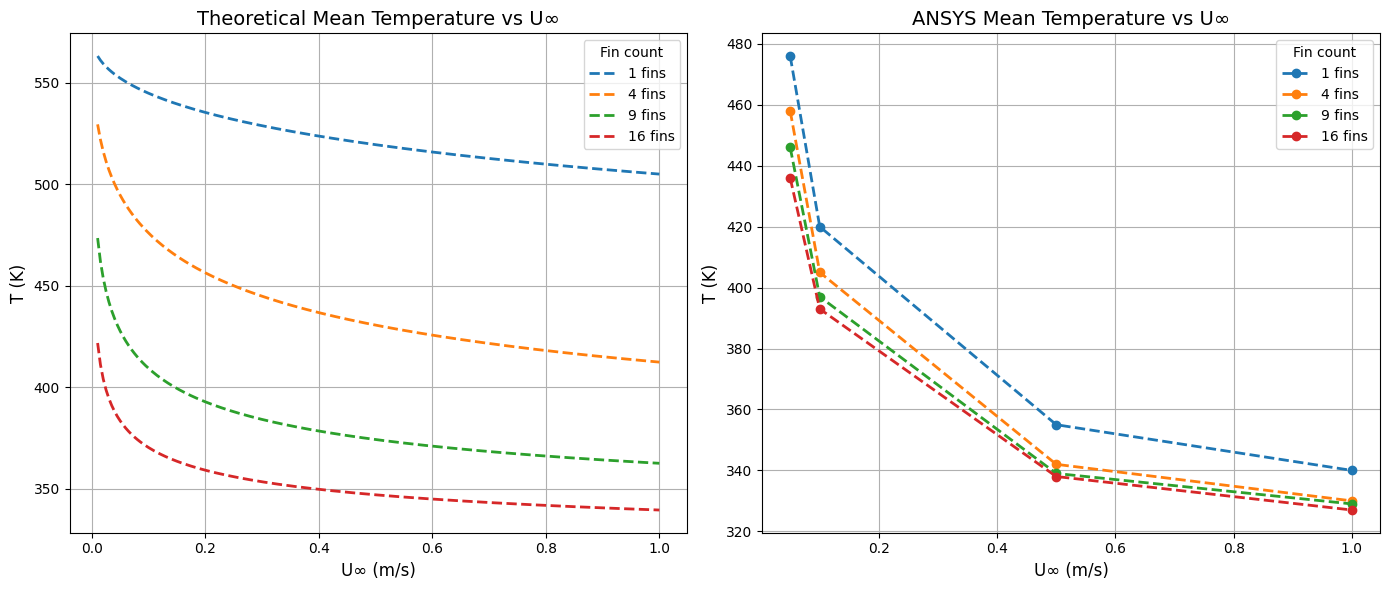

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Given values for the first equation (fin equation)
P_list = [1.2, 0.58, 0.37, 0.27]
Ac_list = [0.09, 0.021, 0.0087, 0.0045]
n_fin = [1, 4, 9, 16]

L = 0.15
k_fin = 387.6
T_inf = 300
T_b = 573

# For convection correlation
L_h = 1.0
k_air = 0.6
Pr = 7
nu = 0.8007e-6

def h_bar_L(U_inf):
    term = 0.332 * (k_air / L_h) * np.sqrt((U_inf * L_h) / nu) * (Pr ** (1/3))
    return 2 * term

def T_mean(h, P, Ac, n):
    mL = np.sqrt((h * P * L**2) / (k_fin * Ac)) * n
    sqrt_term = np.sqrt((h * Ac) / (k_fin * P)) / n
    num = np.sinh(mL) + sqrt_term * (np.cosh(mL) - 1)
    den = mL * (np.cosh(mL) + sqrt_term * np.sinh(mL))
    return T_inf + (T_b - T_inf) * (num / den)

U_inf_values = np.linspace(0.01, 1, 200)
x_list_T = [0.05, 0.1, 0.5, 1]
y_listansys = [
    [476, 420, 355, 340],
    [458, 405, 342, 330],
    [446, 397, 339, 329],
    [436, 393, 338, 327]
]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i in range(4):
    P, Ac, n = P_list[i], Ac_list[i], np.sqrt(n_fin[i])
    h_values = h_bar_L(U_inf_values)
    T_mean_values = T_mean(h_values, P, Ac, n)

    # Left: theoretical
    axes[0].plot(U_inf_values, T_mean_values, '--', linewidth=2, label=f'{n_fin[i]} fins')

    # Right: ANSYS data
    axes[1].plot(x_list_T, y_listansys[i], 'o--', linewidth=2, label=f'{n_fin[i]} fins')

axes[0].set_title('Theoretical Mean Temperature vs U∞', fontsize=14)
axes[0].set_xlabel('U∞ (m/s)', fontsize=12)
axes[0].set_ylabel('T̄ (K)', fontsize=12)
axes[0].grid(True)
axes[0].legend(title='Fin count')

axes[1].set_title('ANSYS Mean Temperature vs U∞', fontsize=14)
axes[1].set_xlabel('U∞ (m/s)', fontsize=12)
axes[1].set_ylabel('T̄ (K)', fontsize=12)
axes[1].grid(True)
axes[1].legend(title='Fin count')

plt.tight_layout()
plt.show()


In [4]:
print("ANSYS T_mean DATA :: \n")
for row in y_listansys:
  print(row)

print("\nTHEORETICAL T_mean DATA :: \n")
int_theoretical_T = [[int(round(val)) for val in sublist] for sublist in theoretical_T]
for row in int_theoretical_T:
  print(row)



ANSYS T_mean DATA :: 

[476, 420, 355, 340]
[458, 405, 342, 330]
[446, 397, 339, 329]
[436, 393, 338, 327]

THEORETICAL T_mean DATA :: 

[552, 545, 519, 505]
[541, 530, 497, 479]
[531, 518, 479, 460]
[520, 505, 462, 443]


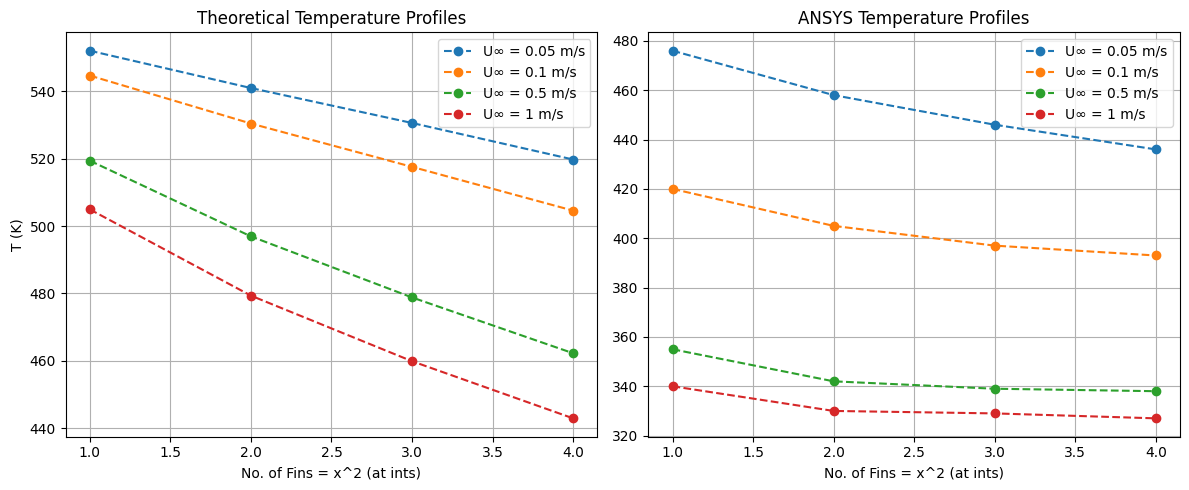

In [5]:
import numpy as np
import matplotlib.pyplot as plt

theoretical_arr = np.asarray(theoretical_T, dtype=float)
ansys_arr       = np.asarray(y_listansys, dtype=float)

unamelist = [0.05, 0.1, 0.5, 1]

n_rows = min(theoretical_arr.shape[0], ansys_arr.shape[0])
n_cols = theoretical_arr.shape[1]

theoretical_arr = theoretical_arr[:n_rows, :]
ansys_arr       = ansys_arr[:n_rows, :]

x = np.arange(1, n_rows + 1)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for col_idx in range(n_cols):
    axes[0].plot(
        x,
        theoretical_arr[:, col_idx],
        'o--',                      # add DOT markers
        label=f'U∞ = {unamelist[col_idx]} m/s'
    )

axes[0].set_title("Theoretical Temperature Profiles")
axes[0].set_xlabel('No. of Fins = x^2 (at ints)')
axes[0].set_ylabel('T (K)')
axes[0].grid(True)
axes[0].legend()

for col_idx in range(n_cols):
    axes[1].plot(
        x,
        ansys_arr[:, col_idx],
        'o--',                      # DOTS
        label=f'U∞ = {unamelist[col_idx]} m/s'
    )

axes[1].set_title("ANSYS Temperature Profiles")
axes[1].set_xlabel('No. of Fins = x^2 (at ints)')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()


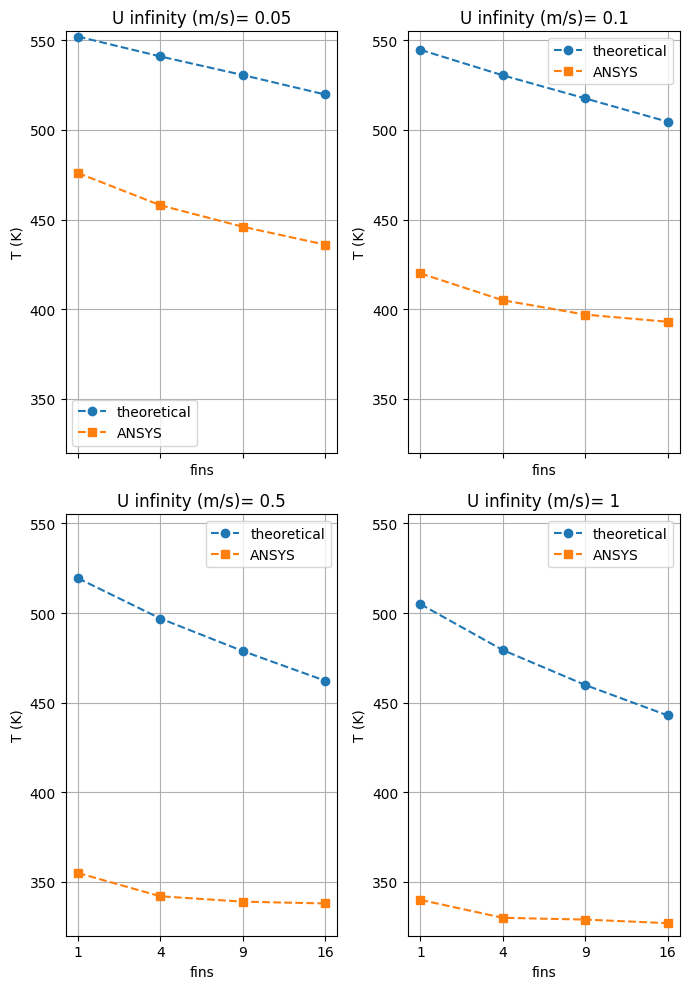

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plot_width = 7
plot_height = 10

theoretical_arr = np.asarray(theoretical_T, dtype=float)
ansys_arr = np.asarray(y_listansys, dtype=float)

unamelist = [0.05, 0.1, 0.5, 1]

n_rows_th, n_cols_th = theoretical_arr.shape
n_rows_an, n_cols_an = ansys_arr.shape

n_rows = n_rows_an
n_cols = n_cols_th
theoretical_arr = theoretical_arr[:n_rows, :]
ansys_arr = ansys_arr[:n_rows, :]

# x positions (1,2,3,4)
x = np.arange(1, n_rows + 1)

# new x-tick labels
fin_labels = [1, 4, 9, 16]

rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(plot_width, plot_height), sharex=True)

for col_idx in range(n_cols):
    ax = axes.flat[col_idx]
    ax.plot(x, theoretical_arr[:, col_idx], 'o--', label='theoretical')
    ax.plot(x, ansys_arr[:, col_idx], 's--', label='ANSYS')

    ax.set_title(f'U infinity (m/s)= {unamelist[col_idx]}')
    ax.set_xlabel('fins')
    ax.set_ylabel('T (K)')

    ax.set_xticks(x)
    ax.set_xticklabels(fin_labels)

    ax.margins(x=0.05)
    ax.set_ylim(320, 555)

    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()
